In [2]:
%matplotlib notebook  
%matplotlib inline
import matplotlib.pyplot as plt # for plotting          
import numpy as np
# import our Pendulum class from Particle1D
from Particle1D import Pendulum
import LogisticMap as lm

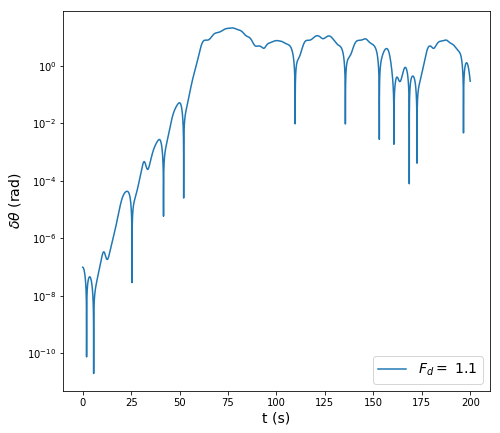

In [27]:
#Problem 1
# Driving force amplitude
Fd = 1.1

# Initial theta
theta0 = 0.2

# Difference in initial position
delta_theta0 = 0.0000001


tf = 200
dt = 0.01

# Initialize objects and calculate trajectories
p1 = Pendulum(nu = 1/2, Fd = Fd, omega_d = 0.6 , x0 = theta0, tf = tf, dt = dt)
p2 = Pendulum(nu = 1/2, Fd = Fd, omega_d = 0.6 , x0 = theta0+delta_theta0, tf = tf, dt = dt)
p1.scipy_trajectory()
p2.scipy_trajectory()

# difference between two directorys
delta_theta = np.abs(p1.xv_unwrap[:,0] - p2.xv_unwrap[:,0])
fit = np.polyfit(p1.tarray[:10000], delta_theta[:10000], deg=6)
f = np.poly1d(fit)

# Make Plot    
fig = plt.figure(figsize = [8,6])
ax = fig.subplots(1,1)


# plot on a log scale
#ax.semilogy(p1.tarray[:75], fit)
ax.semilogy(p1.tarray, delta_theta, label = "$F_d =$ {}".format(Fd))

ax.set_ylabel('$\delta \\theta$ (rad)', fontsize = 14)
ax.set_xlabel('t (s)', fontsize = 14)
ax.legend(loc = 4, fontsize = 14)
    
fig.subplots_adjust(top = 0.96, bottom =0.08, left = 0.24, right =0.98)
plt.show()

Text(0,0.5,'$x_n$')

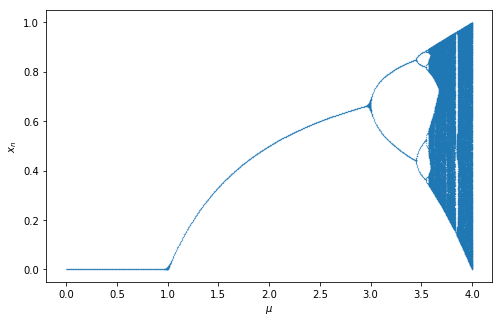

In [73]:
#Problem 3
# Generate a bifrucation diagram
mu_start = 0
mu_stop = 4
mu_steps = 1000

x0 = 0.8 

# Generate an array of mu values
mus = np.linspace(mu_start, mu_stop, mu_steps)
  
# containers for mu values and logistic map values
mu_list = []
m_list = []

i = 0
bifurc = [0]
for mu in mus:
    m = lm.LogisticMap(x0, mu = mu)
    
    # initialize method removes transient
    m.initialize(100)
    m.iterate(1000)
        
    m_points = np.array(m.xList)
    m_points = np.unique(np.round(m_points,3))
    if (len(m_points) > 2**i and mu > bifurc[i]+.04):
        bifurc.append(mu)
        i = i+1
    
    for m in m_points:
        mu_list.append(mu)
        m_list.append(m)
fig = plt.figure(figsize = [8,5])
ax = fig.add_subplot(111)
ax.plot(mu_list, m_list,'.', markersize = 0.5)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$x_n$')

In [65]:
x1 = bifurc[2]
x2 = bifurc[3]
x3 = bifurc[4]
x4 = bifurc[5]

f1 = (x2 - x1)/(x3 - x2)
f2 = (x3-x2)/(x4-x3)
print ((f1 + f2)/2)

4.54583333333
